In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Data import *
from AnalyticalSolution import *
from Loss import *
from GradientDescent import *
from ConjugateGradient import *

# 数据生成

In [2]:
X_SIN = np.linspace(0,1,100)
Y_SIN = sin_func(X_SIN)
X_TRAIN, Y_TRAIN = get_point(10) # 10个数据

# 不带正则项的解析解

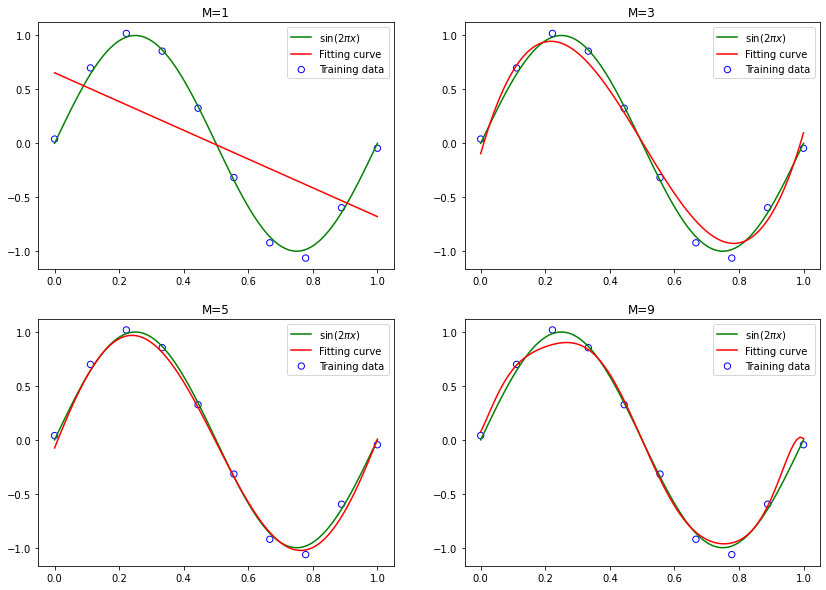

In [3]:
##### 训练集大小为 10 ，不同阶数下拟合 ######
Data_amount = 10
plt.figure(figsize=(14,10))
for i,order in enumerate([1, 3, 5, 9]):  
    plt.subplot(2,2,i+1)
    x, y = get_poly(Data_amount,order)
    plt.scatter(X_TRAIN, Y_TRAIN,edgecolors="b",facecolor="none",s=40,label="Training data")
    plt.plot(X_SIN,Y_SIN,c="g",label="$\sin(2\pi x)$")
    plt.plot(x, y,c="r",label="Fitting curve")
    plt.title("M={}".format(order))
    plt.legend()
plt.show()

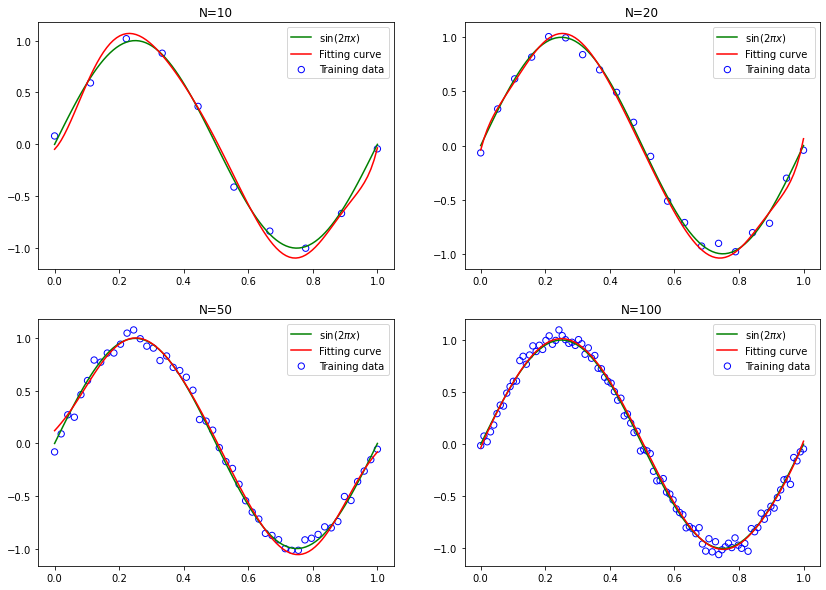

In [4]:
####### 阶数为 9 ，不同训练集大小下拟合 #####
Order = 9
plt.figure(figsize=(14,10))
for i,Data_amount in enumerate([10, 20, 50, 100]):  
    plt.subplot(2,2,i+1)
    x_train, y_train = get_point(Data_amount)
    x, y = get_poly(Data_amount,Order)
    plt.scatter(x_train, y_train,edgecolors="b",facecolor="none",s=40,label="Training data")
    plt.plot(X_SIN, Y_SIN,c="g",label="$\sin(2\pi x)$")
    plt.plot(x, y,c="r",label="Fitting curve")
    plt.title("N={}".format(Data_amount))
    plt.legend()
plt.show()


# 带正则项的解析解

In [5]:
def cal_W(X, T, _lambda):
    return np.linalg.pinv(X.T @ X + (10 ** _lambda) * np.identity(X.shape[1])) @ X.T @ T

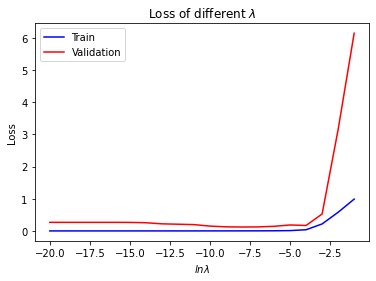

In [6]:
## 训练集为 10，验证集为 20 ###
Data_amount = 10 
Validation = 100
Order = 9
X, T = get_param(Data_amount, Order)
###### 验证集 无噪声 #######   获得 X_val, Y_val
x_train = np.linspace(0,1,Validation)  
Y_val = (sin_func(x_train)).T  
X_val = []
for i in range(0,Validation):
    x = [1.]
    for j in range(Order):
        x.append(x[-1] * x_train[i])  # X_i = [1  x_i  x_i^2  ...  x_i^M]
    X_val.append(x)  # X = [X_1  X_2  ...  X_i  ...  X_N]
X_val = np.array(X_val)
##########################
Lambda = []
Loss = []
Loss_val = []
for _lambda in range(-20, 0):
    Lambda.append(_lambda)
    W = cal_W(X, T, _lambda)
    loss = cal_loss(X, W, T, _lambda)
    loss_val = cal_loss(X_val, W, Y_val, _lambda)
    Loss.append(loss)
    Loss_val.append(loss_val)
plt.title("Loss of different $\lambda$")
plt.xlabel("$ln\lambda$")
plt.ylabel("Loss")
plt.plot(Lambda, Loss,c="b",label = "Train")
plt.plot(Lambda, Loss_val,c="r",label = "Validation")
plt.legend()
plt.show()

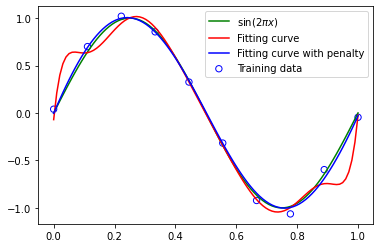

In [7]:
Data_amount = 10 
Order = 9
_lambda = 1e-6
x, y = get_poly(Data_amount,Order)
x_penalty, y_penalty = get_poly_with_penalty(Data_amount, Order, _lambda)
plt.scatter(X_TRAIN, Y_TRAIN,edgecolors="b",facecolor="none",s=40,label="Training data")
plt.plot(X_SIN, Y_SIN,c="g",label="$\sin(2\pi x)$")

plt.plot(x, y,c="r",label="Fitting curve")
plt.plot(x_penalty, y_penalty,c="b",label="Fitting curve with penalty")

plt.legend()
plt.show()


# 梯度下降求得优化解

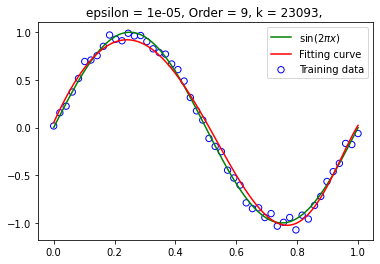

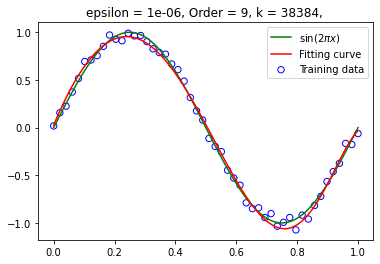

In [8]:
Data_amount = 50
_lambda = -6
_alpha = 0.01
times = 1000000
Order = 9
epsilon_1 = 1e-5 # 精度
x_train, y_train = get_point(Data_amount)
x, y, k = gradient_descent(Data_amount, Order, _lambda, times, _alpha, epsilon_1)
plt.scatter(x_train, y_train,edgecolors="b",facecolor="none",s=40,label="Training data")
plt.plot(X_SIN,Y_SIN,c="g",label="$\sin(2\pi x)$")
plt.plot(x, y,c="r",label="Fitting curve")
plt.title("epsilon = {}, Order = {}, k = {}, ".format(epsilon_1,Order,k))
plt.legend()
plt.show()
###################################
epsilon_2 = 1e-6
x, y, k = gradient_descent(Data_amount, Order, _lambda, times, _alpha, epsilon_2)
plt.scatter(x_train, y_train,edgecolors="b",facecolor="none",s=40,label="Training data")
plt.plot(X_SIN,Y_SIN,c="g",label="$\sin(2\pi x)$")
plt.plot(x, y,c="r",label="Fitting curve")
plt.title("epsilon = {}, Order = {}, k = {}, ".format(epsilon_2,Order,k))
plt.legend()
plt.show()

# 共轭梯度求得优化解

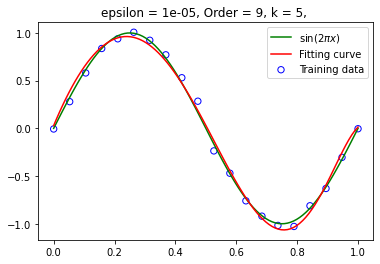

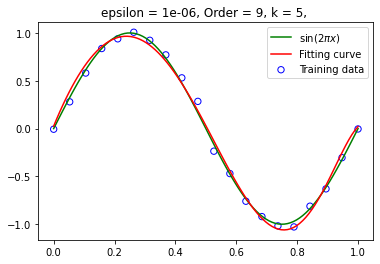

In [9]:
Data_amount = 20
_lambda = -6
_alpha = 0.01
times = 100
epsilon_1 = 1e-5 # 精度
epsilon_2 = 1e-6
Order = 9
X, T = get_param(Data_amount, Order)
x_train, y_train = get_point(Data_amount)
x, y, k = conjugate_gradient(X, T, Order, _lambda, epsilon_1,times)
plt.scatter(x_train, y_train,edgecolors="b",facecolor="none",s=40,label="Training data")
plt.plot(X_SIN,Y_SIN,c="g",label="$\sin(2\pi x)$")
plt.plot(x, y,c="r",label="Fitting curve")
plt.title("epsilon = {}, Order = {}, k = {}, ".format(epsilon_1,Order,k))
plt.legend()
plt.show()
######################
x, y, k = conjugate_gradient(X, T, Order, _lambda, epsilon_2,times)
plt.scatter(x_train, y_train,edgecolors="b",facecolor="none",s=40,label="Training data")
plt.plot(X_SIN,Y_SIN,c="g",label="$\sin(2\pi x)$")
plt.plot(x, y,c="r",label="Fitting curve")
plt.title("epsilon = {}, Order = {}, k = {}, ".format(epsilon_2,Order,k))
plt.legend()
plt.show()